# CAR PRICE PREDICTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/CarPrice.csv")

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
df.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


**Information about Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
df.size

5330

In [ ]:
df.shape

(205, 26)

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0     False      False    False     False       False       False    False   
1     False      False    False     False       False       False    False   
2     False      False    False     False       False       False    False   
3     False      False    False     False       False       False    False   
4     False      False    False     False       False       False    False   
..      ...        ...      ...       ...         ...         ...      ...   
200   False      False    False     False       False       False    False   
201   False      False    False     False       False       False    False   
202   False      False    False     False       False       False    False   
203   False      False    False     False       False       False    False   
204   False      False    False     False       False       False    False   

 

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.fueltype.value_counts())
print(df.aspiration.value_counts())
print(df.doornumber.value_counts())
print(df.carbody.value_counts())
print(df.drivewheel.value_counts())
print(df.enginelocation.value_counts())
print(df.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


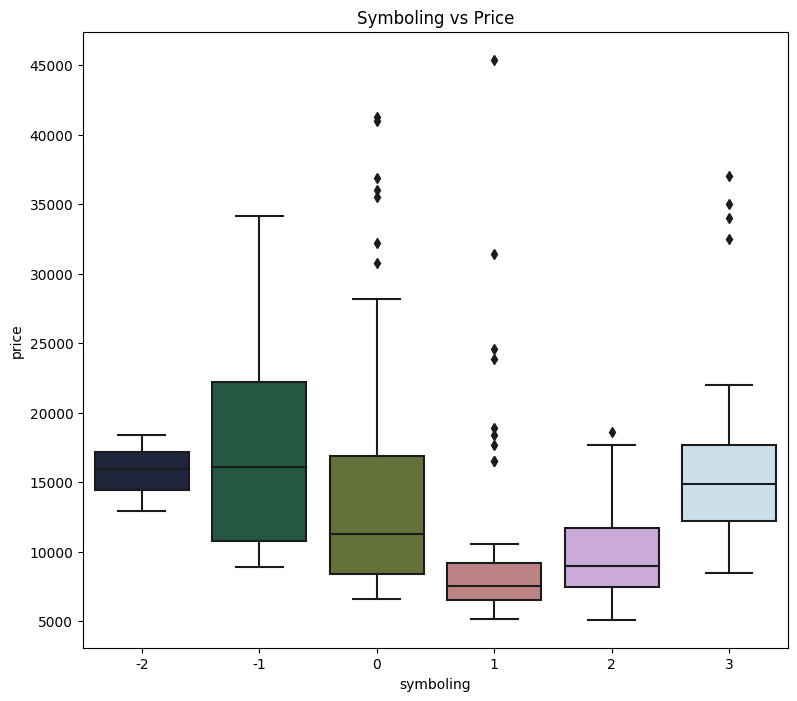

In [ ]:
#relationship bet Sybolling and price

plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))
plt.show()

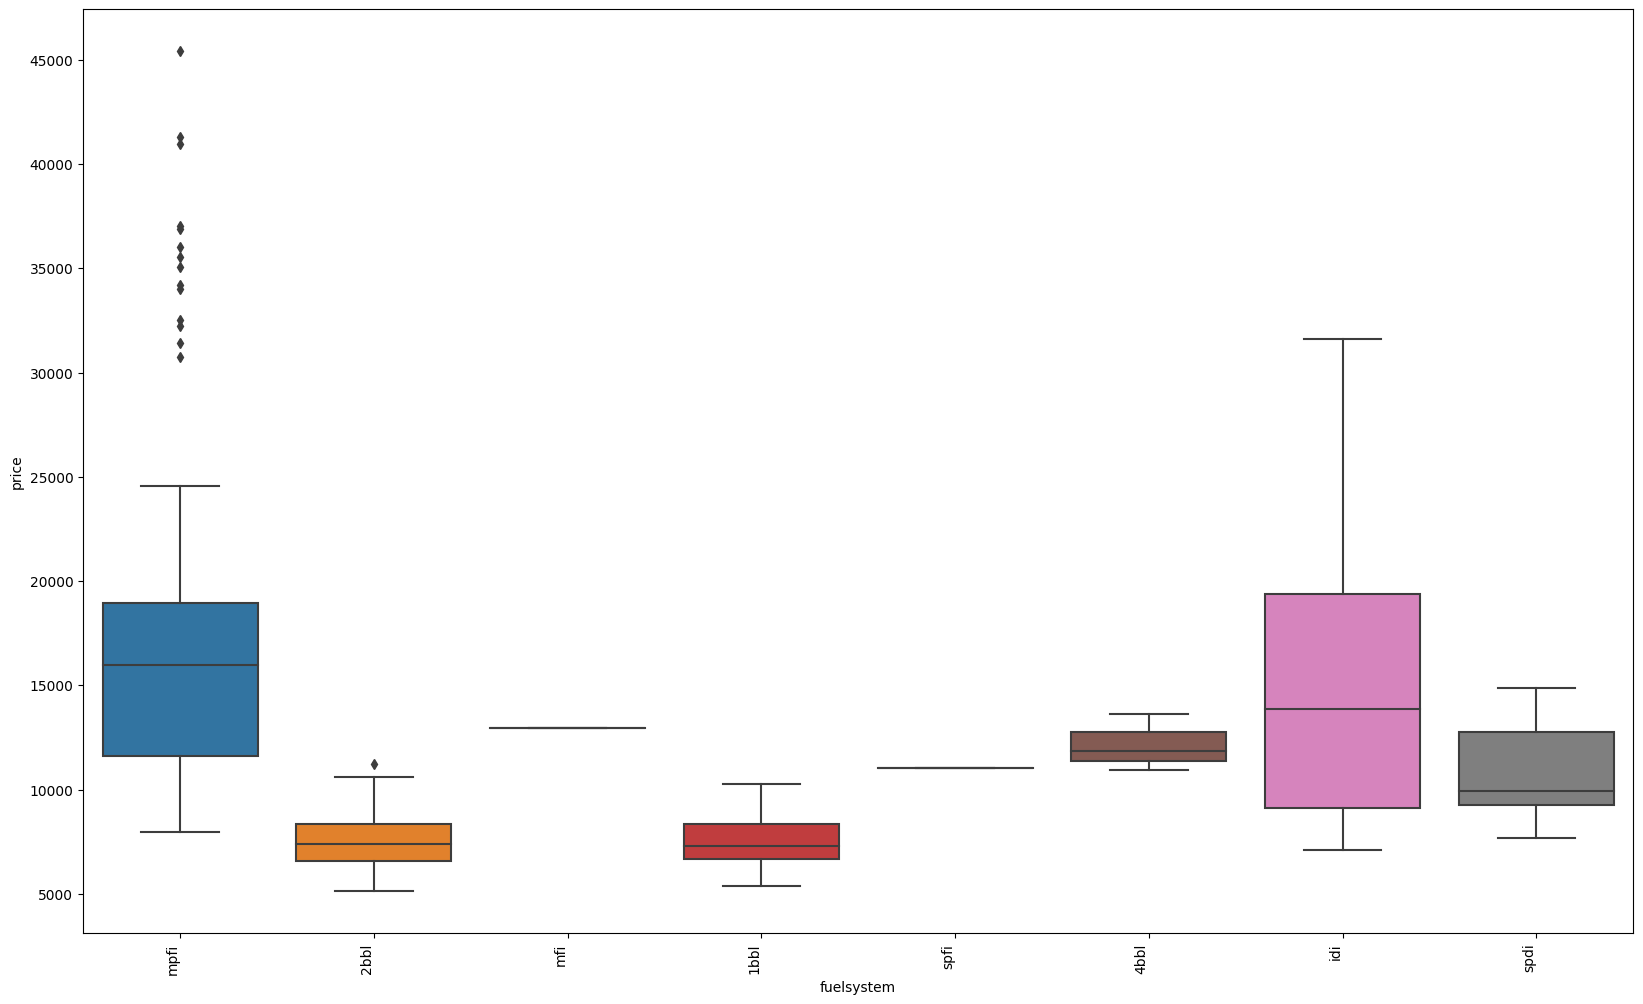

In [ ]:
#relationship between Fuelsystem and price
plt.subplots(figsize=(20,12))
a=sns.boxplot(x='fuelsystem',y='price',data=df)
a.set_xticklabels(a.get_xticklabels(),rotation=90,ha='right')
plt.show()

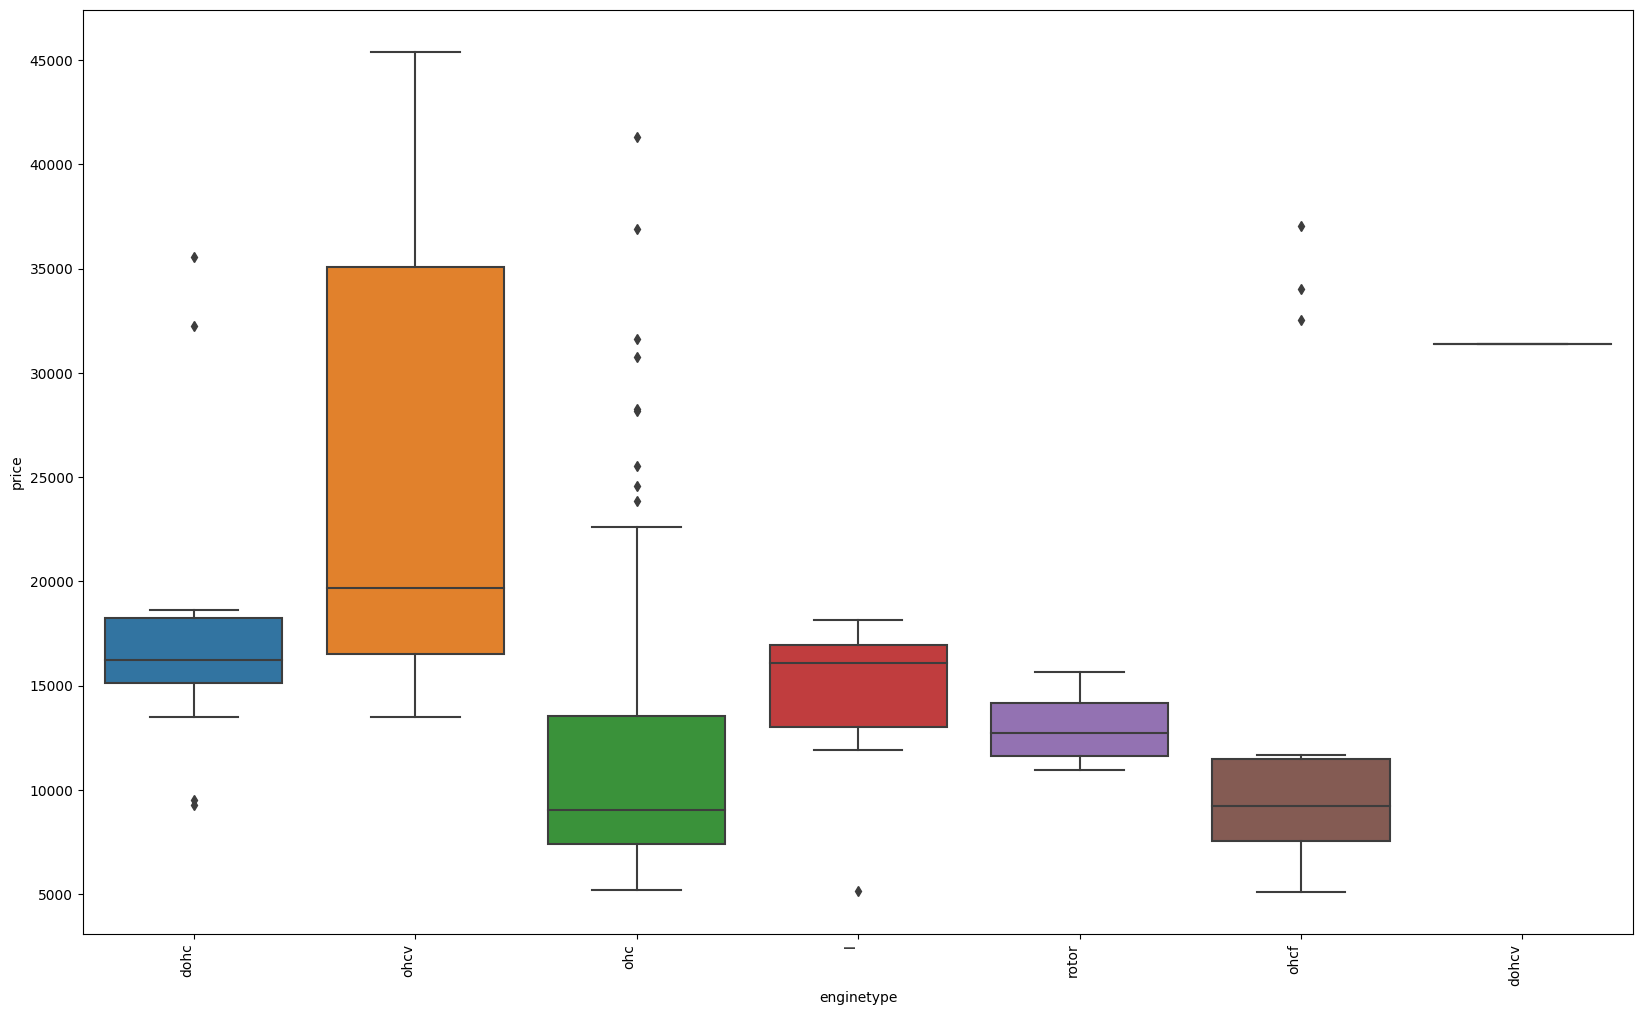

In [ ]:
#relationship between Engine and price
plt.subplots(figsize=(20,12))
a=sns.boxplot(x='enginetype',y='price',data=df)
a.set_xticklabels(a.get_xticklabels(),rotation=90,ha='right')
plt.show()

<ipython-input-144-666c4ca29554>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


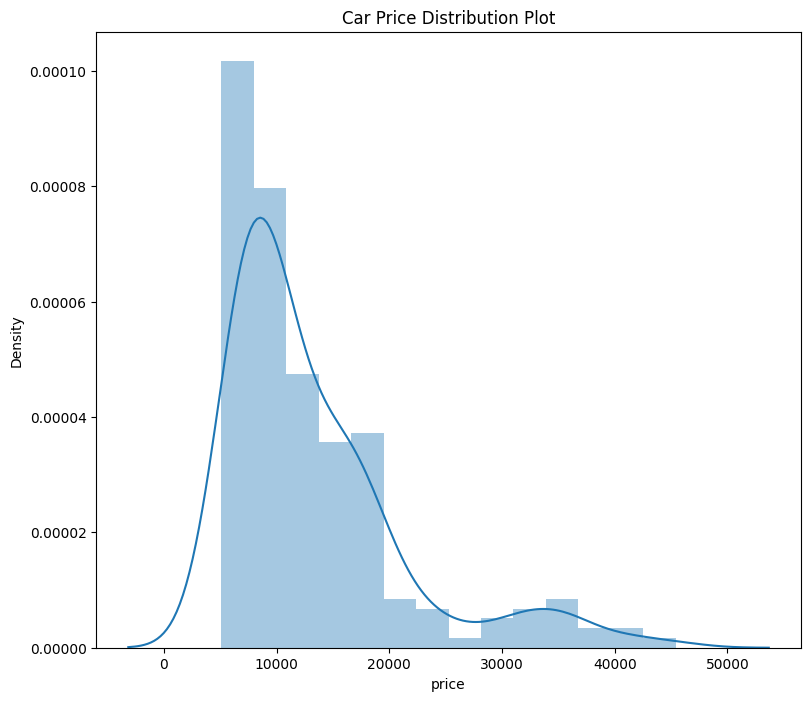

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)
plt.show()

<Figure size 2000x800 with 0 Axes>

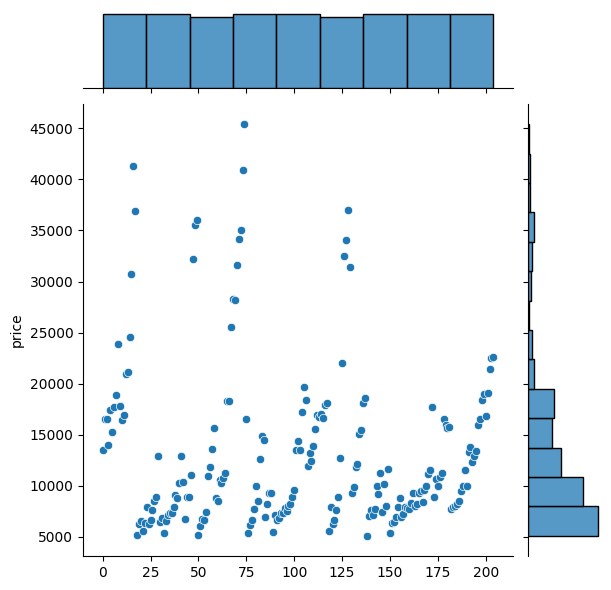

In [ ]:
plt.figure(figsize=(20,8))
sns.jointplot(df.price)
plt.show()

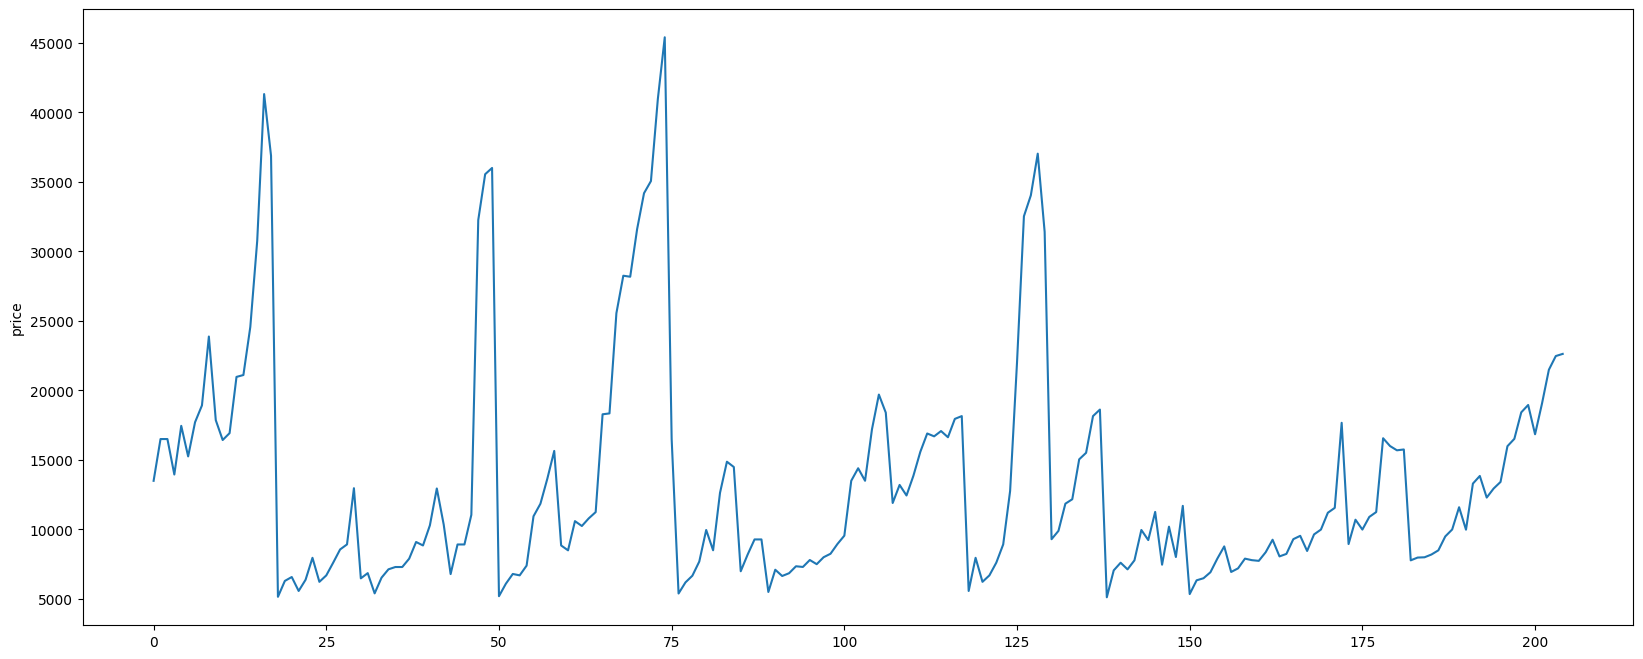

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(df.price)
plt.show()

<Axes: title={'center': 'Car Price Spread'}, ylabel='price'>

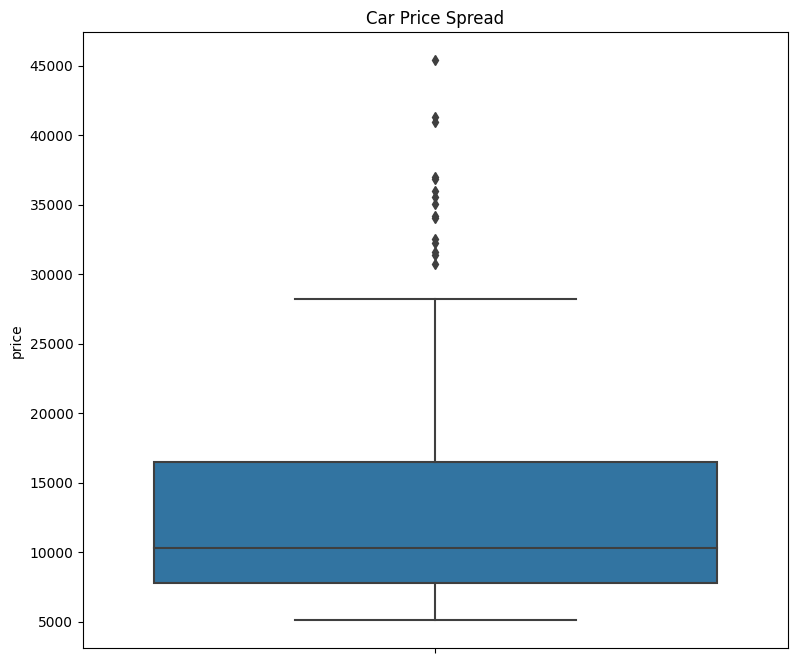

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

**Heatmap**

<ipython-input-148-e661fc3c95e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

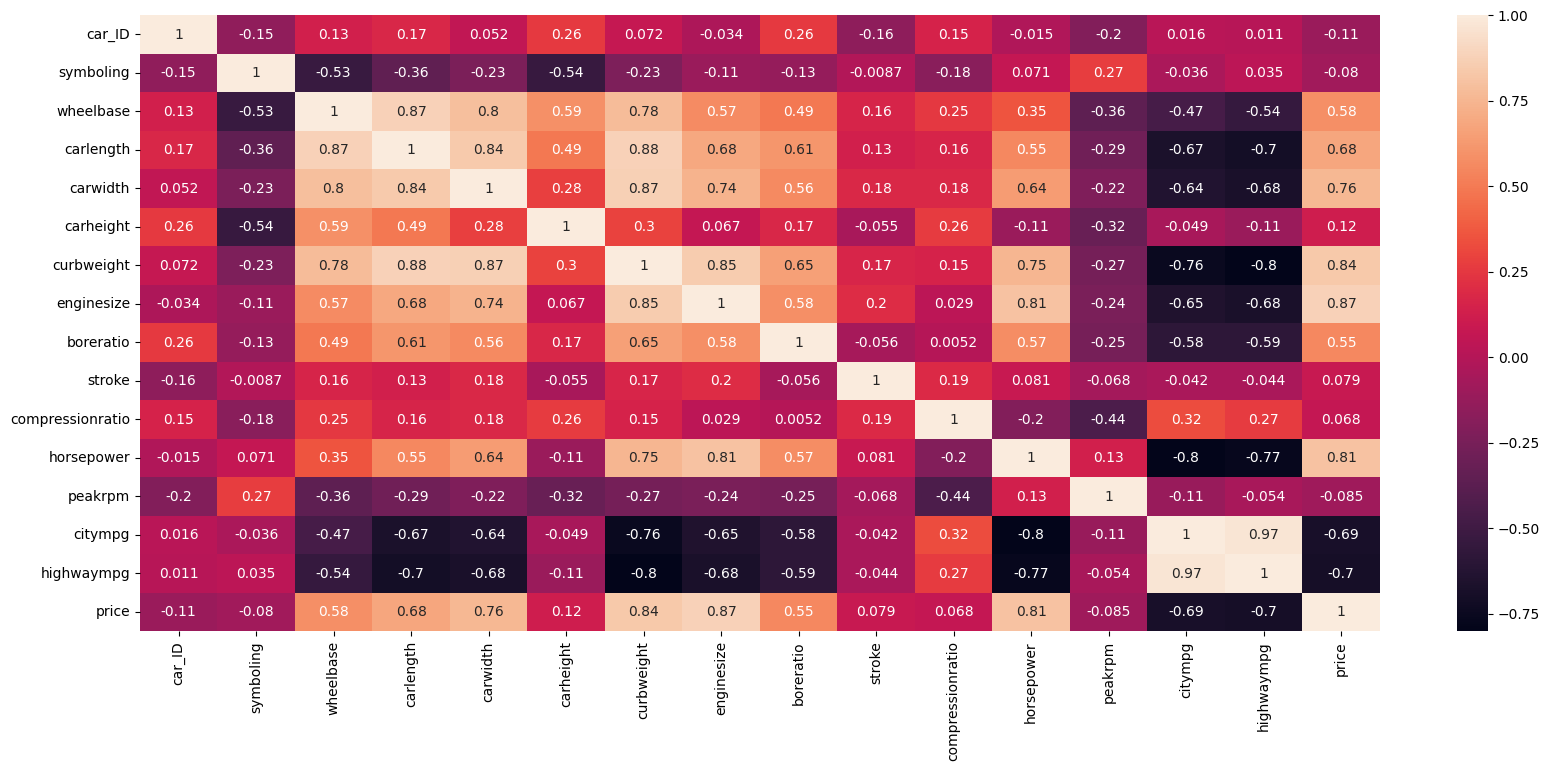

In [ ]:
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

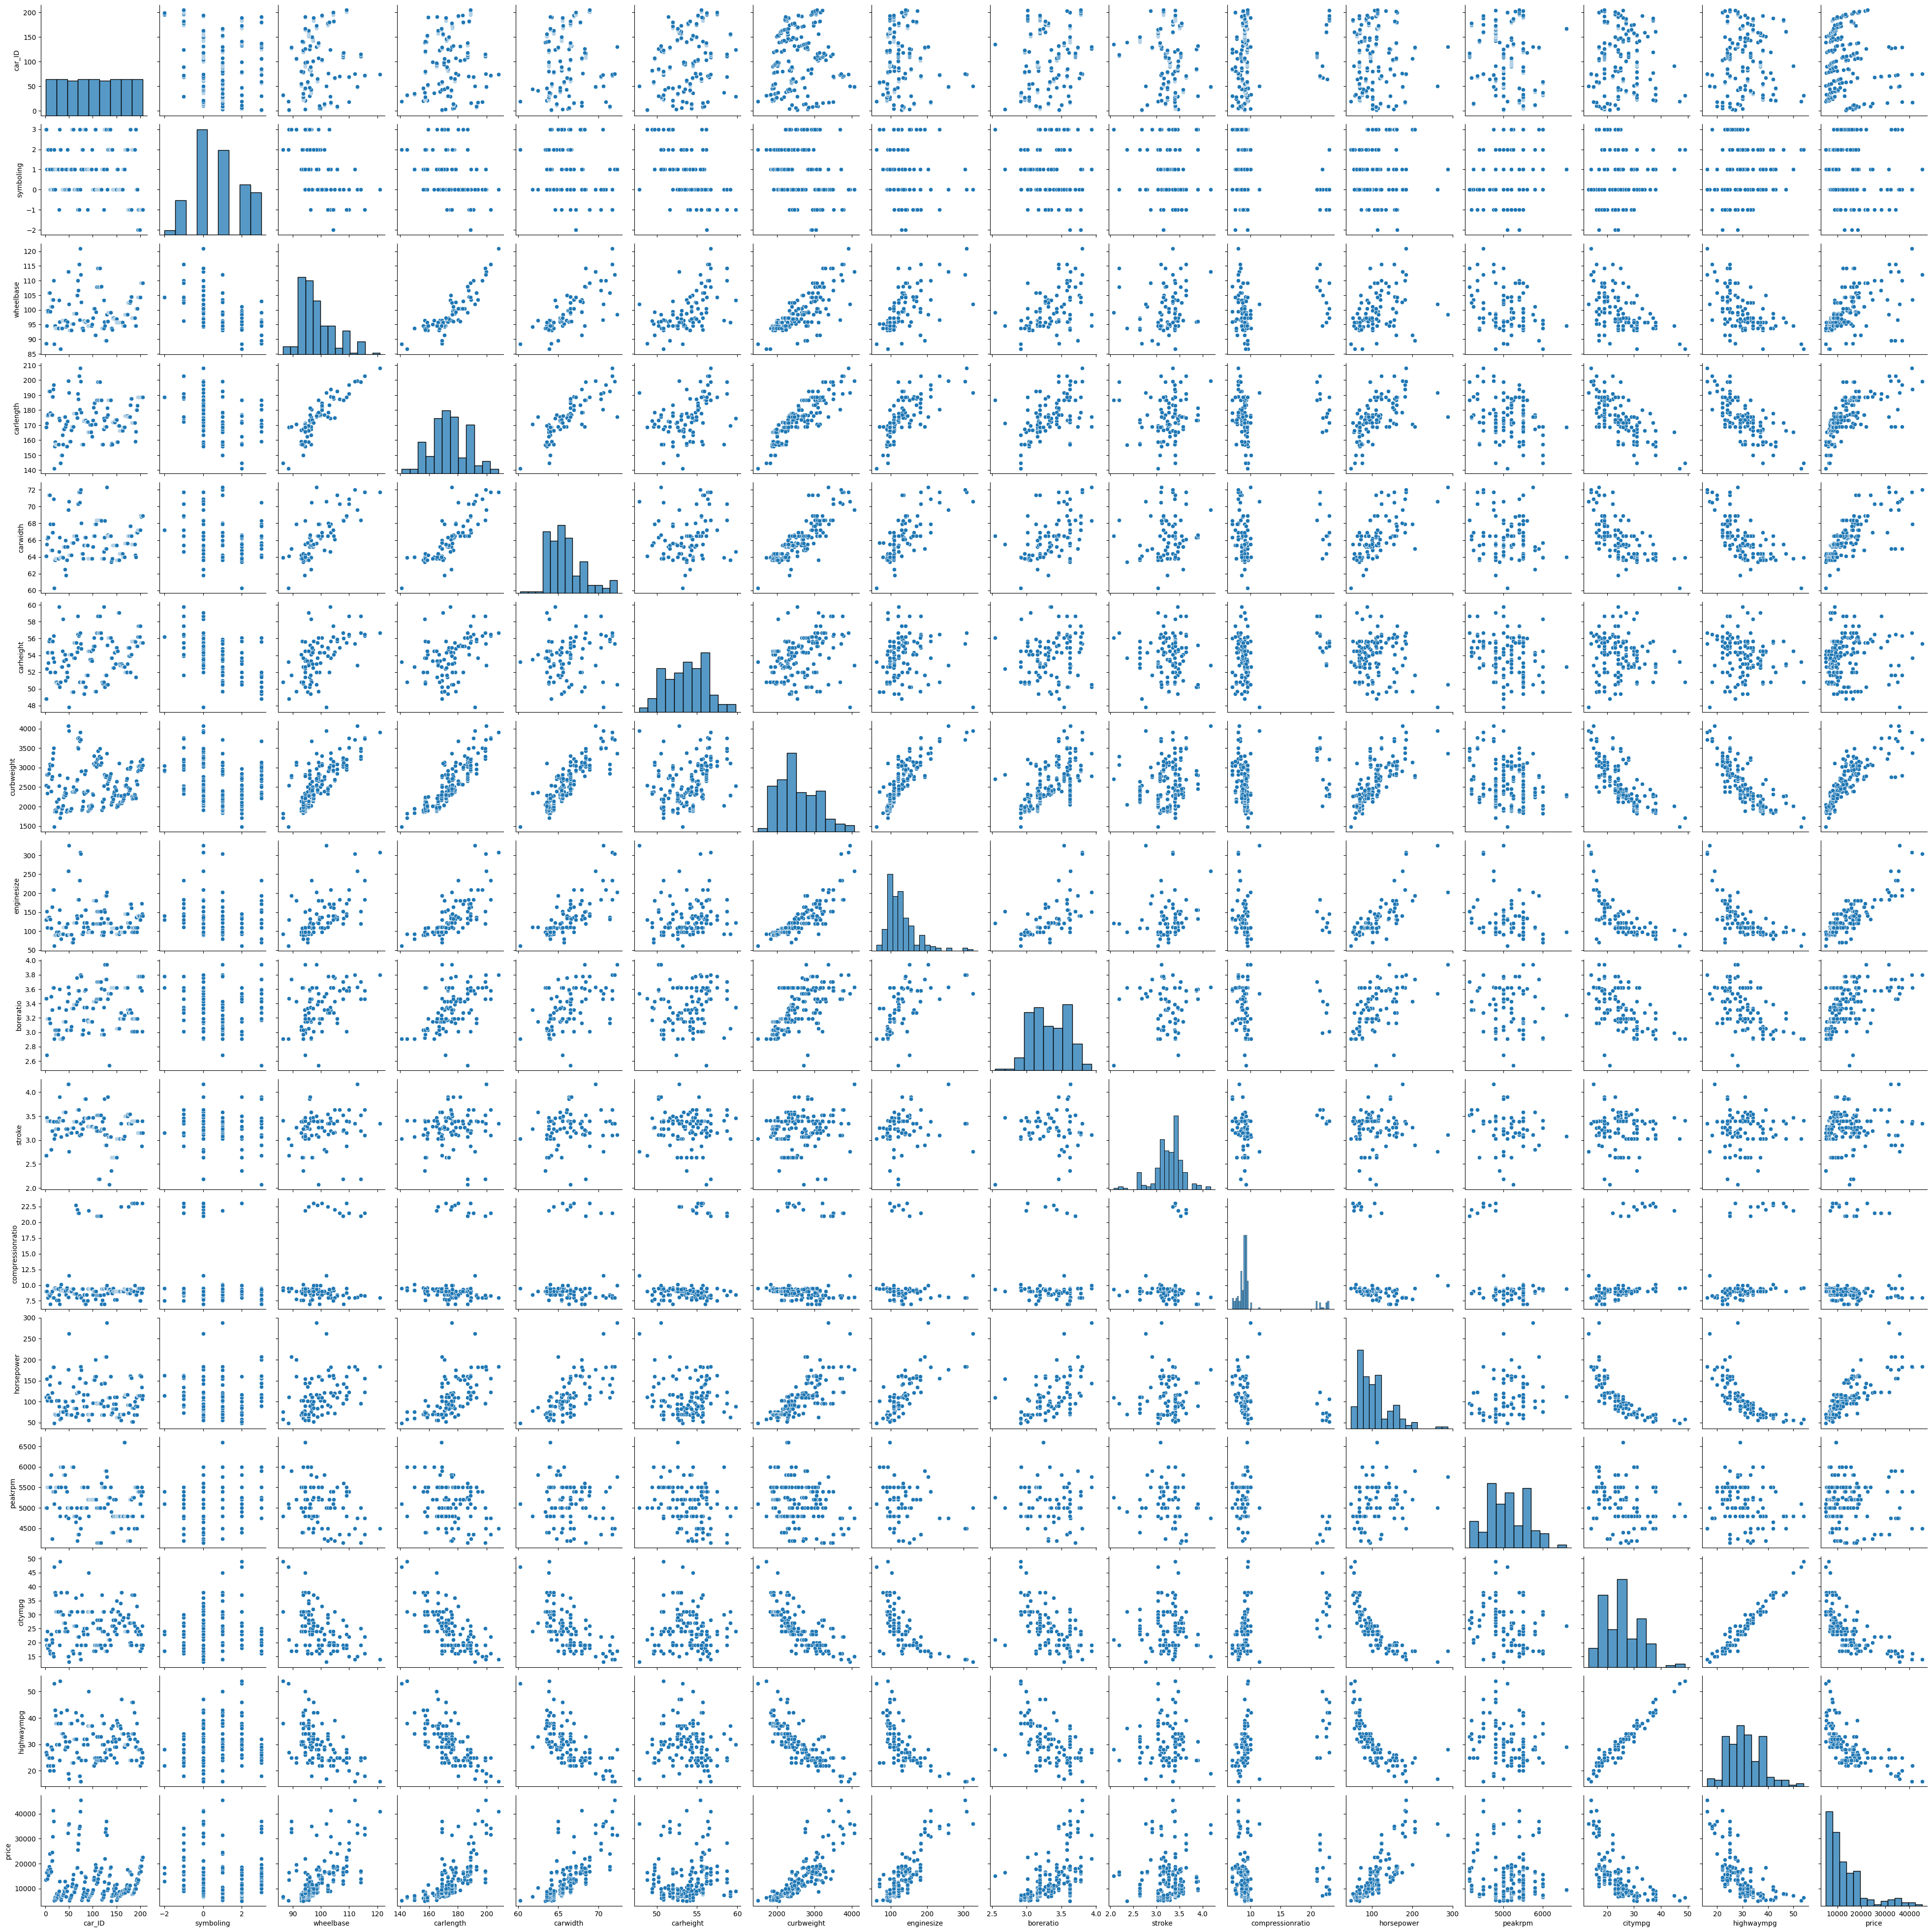

In [ ]:
sns.pairplot(df)

**Training *&* Testing**

In [ ]:
df=pd.get_dummies(df, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','cylindernumber','enginelocation','enginetype', 'fuelsystem'])
print(df)

     car_ID  symboling                   CarName  wheelbase  carlength  \
0         1          3        alfa-romero giulia       88.6      168.8   
1         2          3       alfa-romero stelvio       88.6      168.8   
2         3          1  alfa-romero Quadrifoglio       94.5      171.2   
3         4          2               audi 100 ls       99.8      176.6   
4         5          2                audi 100ls       99.4      176.6   
..      ...        ...                       ...        ...        ...   
200     201         -1           volvo 145e (sw)      109.1      188.8   
201     202         -1               volvo 144ea      109.1      188.8   
202     203         -1               volvo 244dl      109.1      188.8   
203     204         -1                 volvo 246      109.1      188.8   
204     205         -1               volvo 264gl      109.1      188.8   

     carwidth  carheight  curbweight  enginesize  boreratio  ...  \
0        64.1       48.8        2548       

In [ ]:
x_axis = df.drop(['CarName','price'],axis=1)
y_axis = df[['price']]

In [ ]:
x_axis

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
x_axis

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y_axis.head(15)

,price
0,13495.000
1,16500.000
2,16500.000
3,13950.000
4,17450.000
5,15250.000
6,17710.000
7,18920.000
8,23875.000
9,17859.167


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_axis,y_axis,test_size=0.2,random_state=50)

In [ ]:
x_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
180,181,-1,104.5,187.8,66.5,54.1,3131,171,3.27,3.35,...,0,0,0,0,0,0,0,1,0,0
38,39,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,...,0,0,1,0,0,0,0,0,0,0
156,157,0,95.7,166.3,64.4,53.0,2081,98,3.19,3.03,...,0,0,0,1,0,0,0,0,0,0
40,41,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,...,0,0,1,0,0,0,0,0,0,0
195,196,-1,104.3,188.8,67.2,57.5,3034,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.07,...,0,0,0,0,0,0,0,1,0,0
33,34,1,93.7,150.0,64.0,52.6,1940,92,2.91,3.41,...,0,0,1,0,0,0,0,0,0,0
109,110,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,...,0,0,0,0,0,0,0,1,0,0
139,140,2,93.7,157.9,63.6,53.7,2120,108,3.62,2.64,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y_train

,price
180,15690.0
38,9095.0
156,6938.0
40,10295.0
195,13415.0
...,...
132,11850.0
33,6529.0
109,12440.0
139,7053.0


**Linear Regression**

In [ ]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_predt= model1.predict(x_test)

Mean_absolute_error = mean_absolute_error(y_test,y_predt)
print('Mean absolute error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(y_test,y_predt)
print('Mean squared error:',Mean_squared_error)

Root_Mean_squared_error = np.sqrt(Mean_squared_error)
print('Root Mean squared error:',Root_Mean_squared_error)

R_Squared = r2_score(y_test,y_predt)
print('R-Squared:',R_Squared)

AdjRsquared = 1-((1-R_Squared)*(len(x_train)-1)/(len(x_train)))
print(AdjRsquared)

y_predt

Mean absolute error: 1698.0006017192075
Mean squared error: 4307102.172443574
Root Mean squared error: 2075.355914642974
R-Squared: 0.9065677556349151
0.9071374644420193


array([[15876.29783053],
       [12306.16189232],
       [21735.25746944],
       [44742.33984424],
       [13793.44868365],
       [ 8007.43297208],
       [12727.88369542],
       [21551.98768299],
       [ 9743.24890541],
       [ 6226.91078861],
       [14122.25982743],
       [ 6403.6795529 ],
       [24671.8417911 ],
       [ 8484.03841134],
       [ 7922.40097761],
       [10472.4522278 ],
       [13618.4819521 ],
       [11249.03456788],
       [ 8260.89572057],
       [10268.20599843],
       [ 5014.36454719],
       [14383.64475437],
       [ 7343.18487411],
       [20258.28937441],
       [ 7107.70750915],
       [18451.29316837],
       [17861.25954415],
       [ 7215.55781848],
       [ 5148.42282807],
       [11869.91943133],
       [14837.34551332],
       [ 5460.55617591],
       [ 6824.09870719],
       [ 8478.60450998],
       [ 5336.94973241],
       [ 7066.50191834],
       [13346.79517285],
       [ 6972.03390007],
       [ 8656.15602804],
       [ 9211.39621304],


In [ ]:
y_test

,price
113,16695.0
170,11199.0
12,20970.0
73,40960.0
145,11259.0
20,6575.0
107,11900.0
8,23875.0
39,8845.0
89,5499.0


import numpy as np
from google.colab import autoviz
df_8866577905573645637 = autoviz.get_registered_df('df_8866577905573645637')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8866577905573645637, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8866577905573645637 = autoviz.get_registered_df('df_8866577905573645637')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8866577905573645637, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8866577905573645637 = autoviz.get_registered_df('df_8866577905573645637')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8866577905573645637, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8866577905573645637 = autoviz.get_registered_df('df_8866577905573645637')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8866577905573645637, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8866577905573645637 = autoviz.get_registered_df('df_8866577905573645637')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8866577905573645637, *[[['index', 'price']]], **{})
chart

In [ ]:
y_test - y_predt

,price
113,818.702169
170,-1107.161892
12,-765.257469
73,-3782.339844
145,-2534.448684
20,-1432.432972
107,-827.883695
8,2323.012317
39,-898.248905
89,-727.910789


import numpy as np
from google.colab import autoviz
df_3396670057788600131 = autoviz.get_registered_df('df_3396670057788600131')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3396670057788600131, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3396670057788600131 = autoviz.get_registered_df('df_3396670057788600131')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3396670057788600131, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3396670057788600131 = autoviz.get_registered_df('df_3396670057788600131')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3396670057788600131, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3396670057788600131 = autoviz.get_registered_df('df_3396670057788600131')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3396670057788600131, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3396670057788600131 = autoviz.get_registered_df('df_3396670057788600131')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3396670057788600131, *[[['index', 'price']]], **{})
chart